## Trump Data

In [ ]:
# importing necessary libraries 
from pandas import DataFrame
import pandas as pd
from geopy.geocoders import Nominatim
import joblib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import  preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.linear_model import LogisticRegression


In [ ]:
path = "hashtag_donaldtrump.csv"
df = pd.read_csv( path, index_col=None, header=0, engine='python' )

In [ ]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ðŸŒ� Noticias de interÃ©s para latinos de la c...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump â€˜s ...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - Ø±Ù†Ø§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [ ]:
df.shape

(971087, 21)

In [ ]:
df.isna().sum()

created_at                   0
tweet_id                    14
tweet                       14
likes                       42
retweet_count              154
source                    1030
user_id                    158
user_name                  170
user_screen_name           154
user_description        101424
user_join_date             308
user_followers_count       170
user_location           295248
lat                     525385
long                    525382
city                    743907
country                 528355
continent               528338
state                   650473
state_code              670673
collected_at               322
dtype: int64

In [ ]:
df.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(189268, 21)

In [ ]:
df.isna().sum()

created_at              0
tweet_id                0
tweet                   0
likes                   0
retweet_count           0
source                  0
user_id                 0
user_name               0
user_screen_name        0
user_description        0
user_join_date          0
user_followers_count    0
user_location           0
lat                     0
long                    0
city                    0
country                 0
continent               0
state                   0
state_code              0
collected_at            0
dtype: int64

In [ ]:
joblib.dump(df, 'donaldtrump.pkl')

['donaldtrump.pkl']

In [ ]:
df=joblib.load('donaldtrump.pkl')

In [ ]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump â€˜s ...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - Ø±Ù†Ø§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
11,2020-10-15 00:00:25,1.3165293244182405e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,19940334.0,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,1396.0,"Chicago, Illinois",41.875561600000005,-87.6244212,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834
12,2020-10-15 00:00:26,1.3165293286084813e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.2433153463979663e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,496.0,"San Diego, CA",32.7174209,-117.16277140000001,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364
13,2020-10-15 00:00:31,1.316529349290586e+18,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,343956175.0,Sebastian White,SebWrites,"Tortured, literary genius, well probably the f...",...,2755.0,Edinburgh ~ Heart of Scotland!,55.9533456,-3.1883749,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,2020-10-21 00:00:05.225031425


In [ ]:
df.shape

(189268, 21)

In [ ]:
df.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [ ]:
df_waqar=df.iloc[0:50000]
df_maham=df.iloc[50000:100000]
donaldtrump_Sohail_msds20004=df.iloc[100000:150000]
donaldtrump_zobi_msds200010=df.iloc[150000:189268]

In [ ]:
joblib.dump(df_waqar, 'ddonaldtrump_Sohail_msds20004f_waqar.pkl')
joblib.dump(df_maham, 'df_maham.pkl')
joblib.dump(, 'donaldtrump_Sohail_msds20004.pkl')
joblib.dump(donaldtrump_zobi_msds200010, 'donaldtrump_zobi_msds200010.pkl')

['donaldtrump_zobi_msds200010.pkl']

In [ ]:
df=joblib.load('df_waqar.pkl')

## Joe Biden

In [ ]:

# importing necessary libraries 
from pandas import DataFrame
import pandas as pd
from geopy.geocoders import Nominatim
import joblib




In [ ]:
path = "hashtag_donaldtrump.csv"
df = pd.read_csv( path, index_col=None, header=0, engine='python' )

In [ ]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
0,2020-10-15 00:00:01,1.316529221557252e+18,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,TweetDeck,360666534.0,El Sol Latino News,elsollatinonews,ðŸŒ� Noticias de interÃ©s para latinos de la c...,...,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,NaN,United States of America,North America,Florida,FL,2020-10-21 00:00:00
1,2020-10-15 00:00:01,1.3165292227484303e+18,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,Social Mediaset,331617619.0,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie...,...,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:00.373216530
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
3,2020-10-15 00:00:02,1.316529227471237e+18,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,Trumpytweeter,8.28355589206057e+17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we b...",...,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-10-21 00:00:01.119649591
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump â€˜s ...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - Ø±Ù†Ø§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121


In [ ]:
df.shape

(971087, 21)

In [ ]:
df.isna().sum()

created_at                   0
tweet_id                    14
tweet                       14
likes                       42
retweet_count              154
source                    1030
user_id                    158
user_name                  170
user_screen_name           154
user_description        101424
user_join_date             308
user_followers_count       170
user_location           295248
lat                     525385
long                    525382
city                    743907
country                 528355
continent               528338
state                   650473
state_code              670673
collected_at               322
dtype: int64

In [ ]:
df.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
df.shape

(189268, 21)

In [ ]:
df.isna().sum()

created_at              0
tweet_id                0
tweet                   0
likes                   0
retweet_count           0
source                  0
user_id                 0
user_name               0
user_screen_name        0
user_description        0
user_join_date          0
user_followers_count    0
user_location           0
lat                     0
long                    0
city                    0
country                 0
continent               0
state                   0
state_code              0
collected_at            0
dtype: int64

In [ ]:
joblib.dump(df, 'donaldtrump.pkl')

['donaldtrump.pkl']

In [ ]:
df=joblib.load('donaldtrump.pkl')

In [ ]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump â€˜s ...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - Ø±Ù†Ø§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
11,2020-10-15 00:00:25,1.3165293244182405e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,19940334.0,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,1396.0,"Chicago, Illinois",41.875561600000005,-87.6244212,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834
12,2020-10-15 00:00:26,1.3165293286084813e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.2433153463979663e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,496.0,"San Diego, CA",32.7174209,-117.16277140000001,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364
13,2020-10-15 00:00:31,1.316529349290586e+18,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,343956175.0,Sebastian White,SebWrites,"Tortured, literary genius, well probably the f...",...,2755.0,Edinburgh ~ Heart of Scotland!,55.9533456,-3.1883749,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,2020-10-21 00:00:05.225031425


In [ ]:
df.shape

(189268, 21)

In [ ]:
df.columns

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')

In [ ]:
df_waqar=df.iloc[0:50000]
df_maham=df.iloc[50000:100000]
donaldtrump_Sohail_msds20004=df.iloc[100000:150000]
donaldtrump_zobi_msds200010=df.iloc[150000:189268]

In [ ]:
joblib.dump(df_waqar, 'df_waqar.pkl')
joblib.dump(df_maham, 'df_maham.pkl')
joblib.dump(donaldtrump_Sohail_msds20004, 'donaldtrump_Sohail_msds20004.pkl')
joblib.dump(donaldtrump_zobi_msds200010, 'donaldtrump_zobi_msds200010.pkl')

['donaldtrump_zobi_msds200010.pkl']

In [ ]:
df

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump â€˜s ...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - Ø±Ù†Ø§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
11,2020-10-15 00:00:25,1.3165293244182405e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,19940334.0,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,1396.0,"Chicago, Illinois",41.875561600000005,-87.6244212,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834
12,2020-10-15 00:00:26,1.3165293286084813e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.2433153463979663e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,496.0,"San Diego, CA",32.7174209,-117.16277140000001,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364
13,2020-10-15 00:00:31,1.316529349290586e+18,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,343956175.0,Sebastian White,SebWrites,"Tortured, literary genius, well probably the f...",...,2755.0,Edinburgh ~ Heart of Scotland!,55.9533456,-3.1883749,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,2020-10-21 00:00:05.225031425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971049,2020-11-08 23:58:16,1.325588479388967e+18,"@RBReich Bob,\nit's pretty straight forward.\n...",6.0,1.0,Twitter Web App,97740650.0,Ian Sheltering in Oakland,IanWolfeRoss,"people-first urbanist, founder @OppSites. I tw...",...,425.0,"oakland, california",37.804455700000005,-122.27135630000001,Oakland,United States of America,North America,California,CA,2020-11-09 17:47:55.953357
971058,2020-11-08 23:58:44,1.3255885993545687e+18,CÃ³mo pasÃ³ el abogado de Trump de un hotel a ...,0.0,1.0,Twitter Web App,84963978.0,Impacto Latino,ImpactoLatino,"Ãšltimas noticias de Nueva York, Estados Unido...",...,1517.0,New York City,40.7127281,-74.0060152,New York,United States of America,North America,New York,NY,2020-11-09 17:47:56.007886
971063,2020-11-08 23:58:51,1.3255886275948954e+18,Have you know decency #Trump @GOP? Do you kno...,3.0,0.0,Twitter Web App,48352311.0,"Linda ""I Voted for Biden"" Kenney Baden",KenneyBaden,"TrialLawyer https://t.co/1C0kKESSUC, Played by...",...,3024.0,"New York, USA",40.7127281,-74.0060152,New York,United States of America,North America,New York,NY,2020-11-09 17:47:55.833725
971064,2020-11-08 23:58:54,1.325588638462251e+18,@TeamTrump @alex281832 #Trump is being made to...,1.0,0.0,Twitter for Android,500886203.0,Ken NobleðŸ˜Ž,knoble62,Believe in live & let live. Tweets are persona...,...,453.0,"West London, UK",51.532568,-0.4807,London,United Kingdom,Europe,England,ENG,2020-11-09 17:47:55.944382


## Lat Long

just upload your own pikle file. I can share your pikle file with all of you by your name. 
Upload your name pikle file like df_waqar.Run it and safe csv with your name.


In [ ]:
df=joblib.load('df_waqar.pkl')

In [ ]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
2,2020-10-15 00:00:02,1.316529228091847e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,1185.0,Portland,45.5202471,-122.6741949,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060
4,2020-10-15 00:00:08,1.3165292523014513e+18,You get a tie! And you get a tie! #Trump â€˜s ...,4.0,3.0,Twitter for iPhone,47413798.0,Rana Abtar - Ø±Ù†Ø§ Ø£Ø¨ØªØ±,Ranaabtar,"Washington Correspondent, Lebanese-American ,c...",...,5393.0,Washington DC,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121
11,2020-10-15 00:00:25,1.3165293244182405e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,19940334.0,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,1396.0,"Chicago, Illinois",41.875561600000005,-87.6244212,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834
12,2020-10-15 00:00:26,1.3165293286084813e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.2433153463979663e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,496.0,"San Diego, CA",32.7174209,-117.16277140000001,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364
13,2020-10-15 00:00:31,1.316529349290586e+18,@Susan_Hutch @JoeBiden #Ukraine @RealDonaldTru...,2.0,0.0,Twitter Web App,343956175.0,Sebastian White,SebWrites,"Tortured, literary genius, well probably the f...",...,2755.0,Edinburgh ~ Heart of Scotland!,55.9533456,-3.1883749,City of Edinburgh,United Kingdom,Europe,Scotland,SCT,2020-10-21 00:00:05.225031425


In [ ]:
df.shape

(50000, 21)

In [ ]:
df.tail()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,collected_at
222427,2020-10-24 18:20:37,1.320067688673235e+18,"#trump (u Talk To Much &amp; ,(u Never Shut Up...",0.0,0.0,Twitter for Android,2183291336.0,FinFin,TNTLWATH,@SenKamalaHarris Vol Corp Admin Asst /Private ...,...,336.0,"Chicago, IL",41.875561600000005,-87.6244212,Chicago,United States of America,North America,Illinois,IL,2020-10-27 17:42:48.351887
222431,2020-10-24 18:20:48,1.3200677349656617e+18,"Trump Lumberton NC Rally \nREPLAY, WATCH HERE ...",1.0,0.0,Twitter Web App,8.981750207777874e+17,Political Hub,PoliticalHub24,Official Handle Of Political Hub \nhttps://t.c...,...,428.0,"New Delhi, India",28.613895399999997,77.2090057,New Delhi,India,Asia,Delhi,DL,2020-10-27 18:35:06.173133
222434,2020-10-24 18:20:52,1.3200677525651046e+18,#Trump https://t.co/In5RXWa9vn,0.0,0.0,Twitter for iPhone,262802030.0,Michael Broshears,BrodyBroshears,"Husband, father, advising administrator, STLCa...",...,1688.0,"Evansville, Indiana",37.9747645,-87.5558483,Evansville,United States of America,North America,Indiana,IN,2020-10-27 17:42:48.391109
222454,2020-10-24 18:21:48,1.3200679870601298e+18,Serious question: when does the trial start fo...,1.0,1.0,Twitter for iPhone,30656440.0,ITLGuy,ITLStaff,Owner of the #swingers social network https://...,...,3283.0,"Vancouver, British Columbia",49.2608724,-123.11395290000002,Vancouver,Canada,North America,British Columbia,BC,2020-10-27 17:42:48.625909
222464,2020-10-24 18:22:16,1.3200681026174034e+18,@TheTcoaster @StephenKing #Trump A mix of 3 me...,1.0,0.0,Twitter Web App,1654001870.0,Paula Turner,Paula_Turner2,Peace makes for a much better world. War on te...,...,106.0,Washington,38.8949924,-77.0365581,Washington,United States of America,North America,District of Columbia,DC,2020-10-27 17:42:48.340917


In [ ]:
geolocator = Nominatim(user_agent="TTProject",timeout=100)
county_=[]
for index, row in df.iterrows():
    coordinates=(row['lat'], row['long'])
    location =geolocator.reverse(coordinates)
    address = location.raw['address'] 
#     print (address)

    if (address['country_code']=='us') & ('county' in address.keys()):
        county_.append(address['county'])
    else:
        df.drop(index,inplace=True)
    if (index>200):
        break
#     print(index)

In [ ]:
df['County']=county_

In [ ]:
df.to_csv('PreProcessFile.csv', index=False) 

In [ ]:
df.shape

(1440, 22)

## Data Merging

In [ ]:
df12=pd.read_csv('zobi1.csv')
df12.shape

(6219, 22)

In [ ]:
df13=pd.read_csv('zobi2.csv')
df13.shape

(3427, 22)

In [ ]:
df14=pd.read_csv('zobi3.csv')
df14.shape

(1414, 22)

In [ ]:
df15=pd.read_csv('zobi4.csv')
df15.shape

(792, 22)

In [ ]:
df16=pd.read_csv('zobi5.csv')
df16.shape

(1440, 22)

In [ ]:
df=df1.append([df2,df3,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16],ignore_index = True)

In [ ]:
df.shape


(84543, 22)

In [ ]:
df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,County
0,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Multnomah County
1,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834,Cook County
2,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,San Diego County
3,2020-10-15 00:01:14,1.316530e+18,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:08.210763668,Multnomah County
4,2020-10-15 00:01:23,1.316530e+18,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,Twitter Web App,1.016593e+08,John Ubaldi,ubaldireports,Just Facts... No Fiction on domestic and globa...,...,"Tampa, Florida",27.947760,-82.458444,Tampa,United States of America,North America,Florida,FL,2020-10-21 00:00:10.076846320,Hillsborough County


In [ ]:
df.to_csv('hashtag_donaldtrump_out.csv', index=False)

In [ ]:
df_j_1=pd.read_csv('talha_joebiden.csv')
df_j_1.shape

(19539, 22)

In [ ]:
df_j_2=pd.read_csv('joebiden_Sidrah.csv')
df_j_2.shape

(22209, 22)

In [ ]:
df_j_3=pd.read_csv('joebiden_Askari.csv')
df_j_3.shape

(32892, 22)

In [ ]:
df2=df_j_1.append([df_j_2,df_j_3],ignore_index = True)
df2.shape

(74640, 22)

In [ ]:
df2.to_csv('hashtag_joebiden_out.csv', index=False)

# Twitter Sentiment Analysis

In [ ]:
tweets_trump=pd.read_csv('hashtag_donaldtrump_out.csv')
tweets_trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,County
0,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Multnomah County
1,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834,Cook County
2,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,San Diego County
3,2020-10-15 00:01:14,1.316530e+18,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:08.210763668,Multnomah County
4,2020-10-15 00:01:23,1.316530e+18,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,Twitter Web App,1.016593e+08,John Ubaldi,ubaldireports,Just Facts... No Fiction on domestic and globa...,...,"Tampa, Florida",27.947759,-82.458444,Tampa,United States of America,North America,Florida,FL,2020-10-21 00:00:10.076846320,Hillsborough County


In [ ]:
tweets_biden=pd.read_csv('hashtag_joebiden_out.csv')
tweets_trump.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,County
0,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Multnomah County
1,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834,Cook County
2,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,"San Diego, CA",32.717421,-117.162771,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,San Diego County
3,2020-10-15 00:01:14,1.316530e+18,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:08.210763668,Multnomah County
4,2020-10-15 00:01:23,1.316530e+18,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,Twitter Web App,1.016593e+08,John Ubaldi,ubaldireports,Just Facts... No Fiction on domestic and globa...,...,"Tampa, Florida",27.947759,-82.458444,Tampa,United States of America,North America,Florida,FL,2020-10-21 00:00:10.076846320,Hillsborough County


In [ ]:
tweets_election_df=tweets_biden.append(tweets_trump)
tweets_election_df.head()

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,user_location,lat,long,city,country,continent,state,state_code,collected_at,County
0,2020-11-06 09:54:29,1.324651e+18,#biden takes the lead in #Georgia if this hold...,2.0,0.0,Twitter for iPhone,8.643197e+17,Christian von Fletcher,C_von_Fletcher,Member of the OC Bang Bang Club. Student Journ...,...,"San Francisco, CA",37.779026,-122.419906,San Francisco,United States of America,North America,California,CA,2020-11-07 11:50:25.201121,San Francisco City and County
1,2020-11-06 09:54:42,1.324651e+18,@ChrisCuomo #Biden going to win #Georgia and #...,0.0,0.0,Twitter for iPhone,1.191910e+09,Janalla,Janalla808,"Doggie Doc, Concerned Citizen",...,"Kailua, HI",21.394833,-157.729891,Kailua,United States of America,North America,Hawaii,HI,2020-11-07 11:50:25.264084,Honolulu County
2,2020-11-06 09:54:59,1.324651e+18,"November 6, 2020:\n\nThe Night The Lights Went...",3.0,0.0,Twitter Web App,1.289975e+18,Brian Anthony Bowen,BrianAnthonyBo1,American | Entrepreneur | Democrat | Voter | G...,...,"Houston, Texas",29.758938,-95.367697,Houston,United States of America,North America,Texas,TX,2020-11-07 11:50:25.233266,Harris County
3,2020-11-06 09:55:03,1.324652e+18,@TeamPelosi @Lynnsplace2018 @fred_guttenberg #...,2.0,1.0,Twitter Web App,5.759260e+08,Albert DeAscentis,AlbertDeAscenti,"Retired ,Democratic Party Political Activist -...",...,San Diego,32.717421,-117.162771,San Diego,United States of America,North America,California,CA,2020-11-07 11:50:25.242279,San Diego County
4,2020-11-06 09:55:13,1.324652e+18,Peach state is now in the blue column. Biden l...,0.0,0.0,Twitter for iPhone,1.297781e+18,rudy c,rudra_chat,Data Scientist| Avid Reader| Politics Buff( Se...,...,"Austin, TX",30.271129,-97.743700,Austin,United States of America,North America,Texas,TX,2020-11-07 11:50:25.224116,Travis County


In [ ]:
tweets_election_df.shape

(159183, 22)

In [ ]:
tweets_biden.shape

(74640, 22)

In [ ]:
tweets_trump.shape

(84543, 22)

Text(0.5, 1.0, 'Comparison of Twitter mentions of both candidates in all US county as per data collected')

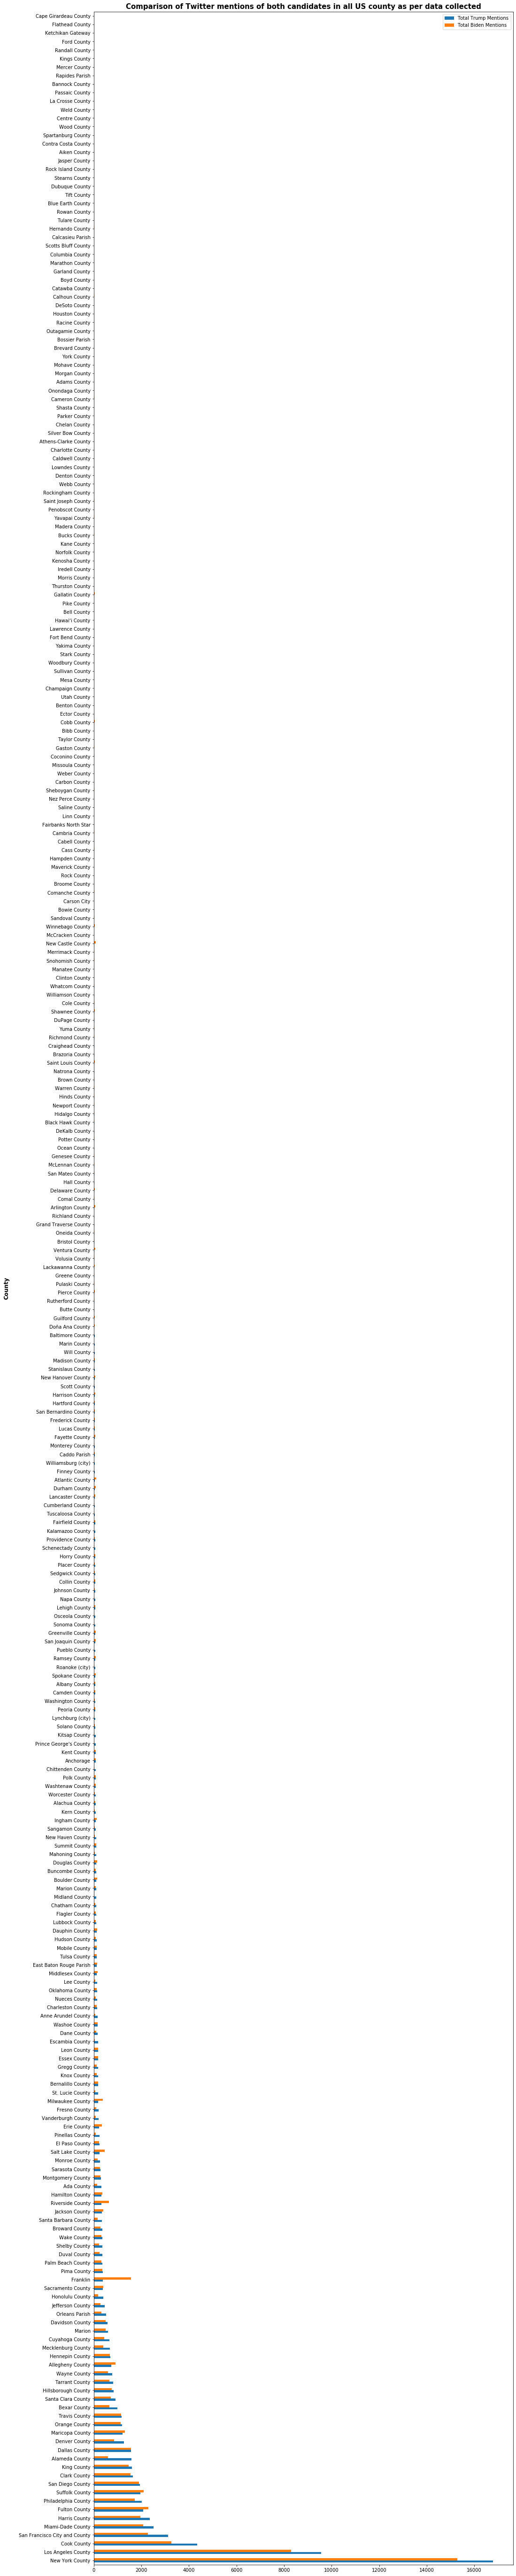

In [ ]:
df = pd.merge(tweets_trump['County'].value_counts(), tweets_biden['County'].value_counts(), right_index = True, 
               left_index = True)
df = df.rename(columns = {"County_x": "Total Trump Mentions", "County_y": "Total Biden Mentions"})
ax = df.plot(kind='barh', figsize=(16,100))

# Set y-axis label
ax.set_ylabel("County", labelpad=20, weight='bold', size=12)
ax.set_title('Comparison of Twitter mentions of both candidates in all US county as per data collected',fontweight="bold", size=15)

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
# VADER Sentiment Analysis. VADER (Valence Aware Dictionary and sEntiment Reasoner) 
# is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments 
# expressed in social media, and works well on texts from other domains

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\waqar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
tweets_trump['sentiment'] = tweets_trump['tweet'].apply(lambda x: sid.polarity_scores(x))
tweets_biden['sentiment'] = tweets_biden['tweet'].apply(lambda x: sid.polarity_scores(x))

In [ ]:
def sentimentVerdict(sentiment):
  if sentiment['compound'] >= 0.05:
    return "Positive"
  elif sentiment['compound'] <= -0.05:
    return "Negative"
  else:
    return "Neutral"

In [ ]:
tweets_trump['sentiment_overall'] = tweets_trump['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_trump.head(5)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,long,city,country,continent,state,state_code,collected_at,County,sentiment,sentiment_overall
0,2020-10-15 00:00:02,1.316529e+18,"#Trump: As a student I used to hear for years,...",2.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:00.746433060,Multnomah County,"{'neg': 0.0, 'neu': 0.942, 'pos': 0.058, 'comp...",Positive
1,2020-10-15 00:00:25,1.316529e+18,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,Twitter for iPhone,1.994033e+07,Change Illinois | Biden will increase taxes by...,changeillinois,"Illinois, home of Lincoln and Reagan, used to ...",...,-87.624421,Chicago,United States of America,North America,Illinois,IL,2020-10-21 00:00:04.105381834,Cook County,"{'neg': 0.103, 'neu': 0.811, 'pos': 0.086, 'co...",Negative
2,2020-10-15 00:00:26,1.316529e+18,#Trump #PresidentTrump #Trump2020LandslideVict...,3.0,5.0,Twitter for Android,1.243315e+18,Ron Burgundy,Anchorman_USA,"I'm kind of a Big Deal, People know me! I driv...",...,-117.162771,San Diego,United States of America,North America,California,CA,2020-10-21 00:00:04.478598364,San Diego County,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,2020-10-15 00:01:14,1.316530e+18,"#Trump: Nobody likes to tell you this, but som...",1.0,1.0,Twitter Web App,8.436472e+06,snarke,snarke,"Will mock for food! Freelance writer, blogger,...",...,-122.674195,Portland,United States of America,North America,Oregon,OR,2020-10-21 00:00:08.210763668,Multnomah County,"{'neg': 0.0, 'neu': 0.855, 'pos': 0.145, 'comp...",Positive
4,2020-10-15 00:01:23,1.316530e+18,"Comments on this? ""Do Democrats Understand how...",0.0,0.0,Twitter Web App,1.016593e+08,John Ubaldi,ubaldireports,Just Facts... No Fiction on domestic and globa...,...,-82.458444,Tampa,United States of America,North America,Florida,FL,2020-10-21 00:00:10.076846320,Hillsborough County,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral


In [ ]:
tweets_trump_location = tweets_trump.groupby(['County', 'sentiment_overall']).count()
tweets_trump_location = tweets_trump_location['user_name']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_trump_location)

County                         sentiment_overall
Ada County                     Negative              109
                               Neutral                80
                               Positive              124
Adams County                   Neutral                 4
Aiken County                   Negative                1
                               Positive                1
Alachua County                 Negative               32
                               Neutral                25
                               Positive               28
Alameda County                 Negative              243
                               Neutral               171
                               Positive             1170
Albany County                  Negative               24
                               Neutral                22
                               Positive               25
Allegheny County               Negative              254
                               Neutral 

In [ ]:
tweets_biden['sentiment_overall'] = tweets_biden['sentiment'].apply(lambda x: sentimentVerdict(x))
tweets_biden.head(20)

,created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,...,long,city,country,continent,state,state_code,collected_at,County,sentiment,sentiment_overall
0,2020-11-06 09:54:29,1.324651e+18,#biden takes the lead in #Georgia if this hold...,2.0,0.0,Twitter for iPhone,8.643197e+17,Christian von Fletcher,C_von_Fletcher,Member of the OC Bang Bang Club. Student Journ...,...,-122.419906,San Francisco,United States of America,North America,California,CA,2020-11-07 11:50:25.201121,San Francisco City and County,"{'neg': 0.091, 'neu': 0.909, 'pos': 0.0, 'comp...",Negative
1,2020-11-06 09:54:42,1.324651e+18,@ChrisCuomo #Biden going to win #Georgia and #...,0.0,0.0,Twitter for iPhone,1.191910e+09,Janalla,Janalla808,"Doggie Doc, Concerned Citizen",...,-157.729891,Kailua,United States of America,North America,Hawaii,HI,2020-11-07 11:50:25.264084,Honolulu County,"{'neg': 0.086, 'neu': 0.704, 'pos': 0.21, 'com...",Positive
2,2020-11-06 09:54:59,1.324651e+18,"November 6, 2020:\n\nThe Night The Lights Went...",3.0,0.0,Twitter Web App,1.289975e+18,Brian Anthony Bowen,BrianAnthonyBo1,American | Entrepreneur | Democrat | Voter | G...,...,-95.367697,Houston,United States of America,North America,Texas,TX,2020-11-07 11:50:25.233266,Harris County,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
3,2020-11-06 09:55:03,1.324652e+18,@TeamPelosi @Lynnsplace2018 @fred_guttenberg #...,2.0,1.0,Twitter Web App,5.759260e+08,Albert DeAscentis,AlbertDeAscenti,"Retired ,Democratic Party Political Activist -...",...,-117.162771,San Diego,United States of America,North America,California,CA,2020-11-07 11:50:25.242279,San Diego County,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
4,2020-11-06 09:55:13,1.324652e+18,Peach state is now in the blue column. Biden l...,0.0,0.0,Twitter for iPhone,1.297781e+18,rudy c,rudra_chat,Data Scientist| Avid Reader| Politics Buff( Se...,...,-97.743700,Austin,United States of America,North America,Texas,TX,2020-11-07 11:50:25.224116,Travis County,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
5,2020-11-06 09:55:28,1.324652e+18,The people of Clayton County have spoken. Dona...,7.0,1.0,Twitter for iPhone,4.243470e+07,Tango,stangog,Liberian ðŸ‡±ðŸ‡· Tweets represent my opinions...,...,-84.390185,Atlanta,United States of America,North America,Georgia,GA,2020-11-07 11:50:25.519156,Fulton County,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
6,2020-11-06 09:55:35,1.324652e+18,UPDATE from #GA via @NBCNews: #Biden now takes...,6.0,0.0,Twitter Web App,1.788974e+07,Susan Tran,susantran,Anchor @NECN 7:00-10:00a & noon @NBC10Boston. ...,...,-71.058291,Boston,United States of America,North America,Massachusetts,MA,2020-11-07 11:50:25.151075,Suffolk County,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
7,2020-11-06 09:55:42,1.324652e+18,#biden has now taken the lead in #Georgia! htt...,1.0,0.0,Twitter for iPhone,1.751862e+07,MattCarey,MattCarey,Editor of https://t.co/AXavLCNag1\nDoc writer/...,...,-118.242766,Los Angeles,United States of America,North America,California,CA,2020-11-07 11:50:25.421822,Los Angeles County,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
8,2020-11-06 09:55:42,1.324652e+18,"Georgia narrowly for #Biden, which hasn't cast...",1.0,0.0,Twitter Web App,9.806742e+06,George Frink,gwfrink3,"Commits journalism/digital lit/AI experiments,...",...,-78.639099,Raleigh,United States of America,North America,North Carolina,NC,2020-11-07 11:50:25.463667,Wake County,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Neutral
9,2020-11-06 09:56:14,1.324652e+18,@JoeBiden Love you man @JoeBiden #JoeBiden #Pr...,0.0,0.0,Twitter for Android,2.832086e+09,Christina ðŸ‡®ðŸ‡¹ðŸ�·ðŸ�•âš“âœˆ,ChrissysBlog,#Nurse ðŸ‘©ðŸ�¼â€�âš•ï¸�ðŸ�¥ #Faith #Hope #Gr...,...,-74.006015,New York,United States of America,North America,New York,NY,2020-11-07 11:42:02.850899,New York County,"{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",Positive

In [ ]:
tweets_biden_location = tweets_biden.groupby(['County', 'sentiment_overall']).count()
tweets_biden_location = tweets_biden_location['user_name']
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(tweets_biden_location)

County                         sentiment_overall
Ada County                     Negative               33
                               Neutral                57
                               Positive               56
Adams County                   Negative                1
                               Neutral                 6
Aiken County                   Negative                1
Alachua County                 Negative               17
                               Neutral                16
                               Positive               27
Alameda County                 Negative              118
                               Neutral               204
                               Positive              283
Albany County                  Negative               19
                               Neutral                20
                               Positive               35
Allegheny County               Negative              221
                               Neutral 

In [ ]:
counties = list(tweets_election_df['County'].unique())
counties

['San Francisco City and County',
 'Honolulu County',
 'Harris County',
 'San Diego County',
 'Travis County',
 'Fulton County',
 'Suffolk County',
 'Los Angeles County',
 'Wake County',
 'New York County',
 'Santa Barbara County',
 'Bexar County',
 'Philadelphia County',
 'Mecklenburg County',
 'Cobb County',
 'Webb County',
 'Brown County',
 'Clark County',
 'Dallas County',
 'Cook County',
 'Shelby County',
 'Sacramento County',
 'King County',
 'Cuyahoga County',
 'Greene County',
 'Alameda County',
 'Orleans Parish',
 'Bernalillo County',
 'Salt Lake County',
 'Oneida County',
 'Miami-Dade County',
 'Montgomery County',
 'Cabell County',
 'Erie County',
 'Hamilton County',
 'Oklahoma County',
 'Fayette County',
 'Anne Arundel County',
 'Gallatin County',
 'Marion',
 'Outagamie County',
 'Grand Traverse County',
 'Davidson County',
 'Orange County',
 'Hillsborough County',
 'Atlantic County',
 'Allegheny County',
 'Maricopa County',
 'Lehigh County',
 'Dane County',
 'Jackson Count

In [ ]:
tweets_location_df = pd.DataFrame({'County': [county_ for county_ in counties],
                                         'Trump Positive': [0 for county_ in counties],
                                         'Trump Negative': [0 for county_ in counties],
                                         'Trump Neutral': [0 for county_ in counties],
                                         'Trump Total': [0 for county_ in counties],
                                         'Biden Positive': [0 for county_ in counties],
                                         'Biden Negative': [0 for county_ in counties],
                                         'Biden Neutral': [0 for county_ in counties],
                                         'Biden Total': [0 for county_ in counties]})
tweets_location_df.set_index('County', inplace = True)
for county_ in counties:
  positiveTrump, negativeTrump, neutralTrump, positiveBiden, negativeBiden, neutralBiden = 0, 0, 0, 0, 0, 0
  try:
    positiveTrump = tweets_trump_location[county_]['Positive']
  except:
    positiveTrump = 0
  
  try:
    negativeTrump = tweets_trump_location[county_]['Negative']
  except:
    negativeTrump = 0
  
  try:
    neutralTrump = tweets_trump_location[county_]['Neutral']
  except:
    neutralTrump = 0
  
  try:
    positiveBiden = tweets_biden_location[county_]['Positive']
  except:
    positiveBiden = 0
  
  try:
    negativeBiden = tweets_biden_location[county_]['Negative']
  except:
    negativeBiden = 0
  
  try:
    neutralBiden = tweets_biden_location[county_]['Neutral']
  except:
    neutralBiden = 0

 
  totalTrump = positiveTrump + negativeTrump + neutralTrump
  totalBiden = positiveBiden + negativeBiden + neutralBiden
#   print('Pos:',positiveTrump)
#   print('Neg:',negativeTrump)
#   print('NEU:',neutralTrump)
#   print('Total:',totalTrump)

  if totalTrump == 0:
    tweets_location_df.at[county_, 'Trump Positive'], tweets_location_df.at[county_, 'Trump Negative'], tweets_location_df.at[county_, 'Trump Neutral'] = 0,0,0
  else:
    tweets_location_df.at[county_, 'Trump Positive'] = round((positiveTrump/totalTrump)*100.0)
    tweets_location_df.at[county_, 'Trump Negative'] = round((negativeTrump/totalTrump)*100.0)
    tweets_location_df.at[county_, 'Trump Neutral'] = round((neutralTrump/totalTrump)*100.0)
  tweets_location_df.at[county_, 'Trump Total'] = totalTrump
  
  if totalBiden == 0:
    tweets_location_df.at[county_, 'Biden Positive'], tweets_location_df.at[county_, 'Biden Negative'], tweets_location_df.at[county_, 'Biden Neutral'] = 0,0,0
  else:
    tweets_location_df.at[county_, 'Biden Positive'] = round((positiveBiden/totalBiden)*100.0)
    tweets_location_df.at[county_, 'Biden Negative'] = round((negativeBiden/totalBiden)*100.0)
    tweets_location_df.at[county_, 'Biden Neutral'] = round((neutralBiden/totalBiden)*100.0)
  tweets_location_df.at[county_, 'Biden Total'] = totalBiden
tweets_location_df

,Trump Positive,Trump Negative,Trump Neutral,Trump Total,Biden Positive,Biden Negative,Biden Neutral,Biden Total
County,,,,,,,,
San Francisco City and County,31,36,34,3118,44,21,35,2281
Honolulu County,33,35,32,402,43,27,30,193
Harris County,25,35,40,2350,33,28,38,1961
San Diego County,32,37,31,1934,39,25,36,1900
Travis County,36,34,30,1168,41,23,36,1145
...,...,...,...,...,...,...,...,...
Burlington County,100,0,0,2,0,0,0,0
Allen County,0,50,50,2,0,0,0,0
Talladega County,100,0,0,1,0,0,0,0


In [ ]:
tweets_location_df['Predicted Judgement'] = 'Neutral'
for index, row in tweets_location_df.iterrows():
  if row['Trump Total'] <= 15 and row['Biden Total'] <= 15:
    tweets_location_df.loc[index, 'Predicted Judgement'] = 'Insufficient Data'
  else:
    if row['Trump Positive'] > row['Biden Positive'] and (row['Trump Negative'] < row['Biden Negative'] or row['Trump Neutral'] > row['Biden Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Republican'
    elif row['Biden Positive'] > row['Trump Positive'] and (row['Biden Negative'] < row['Trump Negative'] or row['Biden Neutral'] > row['Trump Neutral']):
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Strongly Democratic'
    elif row['Trump Positive'] - row['Biden Positive'] > row['Biden Negative'] - row['Trump Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Republican'
    elif row['Biden Positive'] - row['Trump Positive'] > row['Trump Negative'] - row['Biden Negative']:
      tweets_location_df.loc[index, 'Predicted Judgement'] = 'Somewhat Democratic'
tweets_location_df = tweets_location_df.rename(columns={'Trump Positive': 'Trump Positive (in %)', 
                                                        'Trump Negative': 'Trump Negative (in %)',
                                                        'Trump Neutral': 'Trump Neutral (in %)',
                                                        'Trump Total': 'Trump Total Mentions',
                                                        'Biden Positive': 'Biden Positive (in %)',
                                                        'Biden Negative': 'Biden Negative (in %)',
                                                        'Biden Neutral': 'Biden Neutral (in %)',
                                                        'Biden Total': 'Biden Total Mentions'})
tweets_location_df

,Trump Positive (in %),Trump Negative (in %),Trump Neutral (in %),Trump Total Mentions,Biden Positive (in %),Biden Negative (in %),Biden Neutral (in %),Biden Total Mentions,Predicted Judgement
County,,,,,,,,,
San Francisco City and County,31,36,34,3118,44,21,35,2281,Strongly Democratic
Honolulu County,33,35,32,402,43,27,30,193,Strongly Democratic
Harris County,25,35,40,2350,33,28,38,1961,Strongly Democratic
San Diego County,32,37,31,1934,39,25,36,1900,Strongly Democratic
Travis County,36,34,30,1168,41,23,36,1145,Strongly Democratic
...,...,...,...,...,...,...,...,...,...
Burlington County,100,0,0,2,0,0,0,0,Insufficient Data
Allen County,0,50,50,2,0,0,0,0,Insufficient Data
Talladega County,100,0,0,1,0,0,0,0,Insufficient Data


In [ ]:
tweets_location_df.to_csv('US_Sentimental.csv')

In [ ]:
tweets_location_df.groupby('Predicted Judgement').size()

Predicted Judgement
Insufficient Data      126
Somewhat Democratic     14
Somewhat Republican     45
Strongly Democratic    125
Strongly Republican     24
dtype: int64

# **Training on combine dataset**

In [ ]:
df_votes = pd.read_csv('president_county_candidate.csv')
df_votes.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [ ]:
df_votes.isnull().sum()

state          0
county         0
candidate      0
party          0
total_votes    0
won            0
dtype: int64

In [ ]:
df_votes['candidate'] = df_votes['candidate'].astype('str')
df_votes['county'] = df_votes['county'].astype('str')

In [ ]:
df_votes.shape

(32177, 6)

In [ ]:
df_votes.rename(columns={'total_votes': 'votes'}, inplace=True)
df_votes.head()

,state,county,candidate,party,votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [ ]:
county_group = df_votes.groupby('county')['votes'].sum().reset_index()
county_group

,county,votes
0,Abbeville County,12433
1,Abbot,417
2,Abington,9660
3,Acadia Parish,28425
4,Accomack County,16962
...,...,...
3002,Yuba County,29787
3003,Yuma County,74907
3004,Zapata County,3874
3005,Zavala County,4379


In [ ]:
df_2020 = pd.merge(df_votes, county_group, on="county")
df_2020.rename(columns = {'votes_x':'votes','votes_y':'total_votes'}, inplace = True) 
df_2020.head()

,state,county,candidate,party,votes,won,total_votes
0,Delaware,Kent County,Joe Biden,DEM,44552,True,459329
1,Delaware,Kent County,Donald Trump,REP,41009,False,459329
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False,459329
3,Delaware,Kent County,Howie Hawkins,GRN,420,False,459329
4,Maryland,Kent County,Joe Biden,DEM,5329,True,459329


In [ ]:
df_2020 = df_2020[df_2020["candidate"].str.contains('Donald Trump') | df_2020["candidate"].str.contains('Joe Biden') ]
len(df_2020['county'].unique())

3007

In [ ]:
dfsenti = pd.read_csv('US_Sentimental.csv')
dfsenti.rename(columns = {'County':'county'}, inplace = True) 
dfsenti.head()

,county,Trump Positive (in %),Trump Negative (in %),Trump Neutral (in %),Trump Total Mentions,Biden Positive (in %),Biden Negative (in %),Biden Neutral (in %),Biden Total Mentions,Predicted Judgement
0,San Francisco City and County,31,36,34,3118,44,21,35,2281,Strongly Democratic
1,Honolulu County,33,35,32,402,43,27,30,193,Strongly Democratic
2,Harris County,25,35,40,2350,33,28,38,1961,Strongly Democratic
3,San Diego County,32,37,31,1934,39,25,36,1900,Strongly Democratic
4,Travis County,36,34,30,1168,41,23,36,1145,Strongly Democratic


In [ ]:
donald_tweets = dfsenti[['Trump Positive (in %)', 'Trump Negative (in %)', 'Trump Neutral (in %)', 'Predicted Judgement', 'county']]
donald_tweets['candidate'] = 'Donald Trump'
donald_tweets = donald_tweets.rename(columns={"Trump Positive (in %)": "postive", "Trump Negative (in %)": "negative", 
                                              'Trump Neutral (in %)': 'neutral' })
donald_tweets.head()

C:\Users\waqar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,postive,negative,neutral,Predicted Judgement,county,candidate
0,31,36,34,Strongly Democratic,San Francisco City and County,Donald Trump
1,33,35,32,Strongly Democratic,Honolulu County,Donald Trump
2,25,35,40,Strongly Democratic,Harris County,Donald Trump
3,32,37,31,Strongly Democratic,San Diego County,Donald Trump
4,36,34,30,Strongly Democratic,Travis County,Donald Trump


In [ ]:
biden_tweets = dfsenti[['Biden Positive (in %)', 'Biden Negative (in %)', 'Biden Neutral (in %)', 'Predicted Judgement', 'county']]
biden_tweets['candidate'] = 'Joe Biden'
biden_tweets = biden_tweets.rename(columns={"Biden Positive (in %)": "postive", "Biden Negative (in %)": "negative", 
                                              'Biden Neutral (in %)': 'neutral' })
biden_tweets.head()

C:\Users\waqar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,postive,negative,neutral,Predicted Judgement,county,candidate
0,44,21,35,Strongly Democratic,San Francisco City and County,Joe Biden
1,43,27,30,Strongly Democratic,Honolulu County,Joe Biden
2,33,28,38,Strongly Democratic,Harris County,Joe Biden
3,39,25,36,Strongly Democratic,San Diego County,Joe Biden
4,41,23,36,Strongly Democratic,Travis County,Joe Biden


In [ ]:
df_tweets = pd.concat([biden_tweets, donald_tweets])
df_tweets.shape

(668, 6)

In [ ]:
df_tweets.head()

,postive,negative,neutral,Predicted Judgement,county,candidate
0,44,21,35,Strongly Democratic,San Francisco City and County,Joe Biden
1,43,27,30,Strongly Democratic,Honolulu County,Joe Biden
2,33,28,38,Strongly Democratic,Harris County,Joe Biden
3,39,25,36,Strongly Democratic,San Diego County,Joe Biden
4,41,23,36,Strongly Democratic,Travis County,Joe Biden


In [ ]:
dfsenti.shape

(334, 10)

In [ ]:
dfsenti.head()

,county,Trump Positive (in %),Trump Negative (in %),Trump Neutral (in %),Trump Total Mentions,Biden Positive (in %),Biden Negative (in %),Biden Neutral (in %),Biden Total Mentions,Predicted Judgement
0,San Francisco City and County,31,36,34,3118,44,21,35,2281,Strongly Democratic
1,Honolulu County,33,35,32,402,43,27,30,193,Strongly Democratic
2,Harris County,25,35,40,2350,33,28,38,1961,Strongly Democratic
3,San Diego County,32,37,31,1934,39,25,36,1900,Strongly Democratic
4,Travis County,36,34,30,1168,41,23,36,1145,Strongly Democratic


In [ ]:
c1 = df_tweets.county.unique()
c2 = df_2020.county.unique()
c1.shape, c2.shape,np.intersect1d(c1, c2).shape

((334,), (3007,), (310,))

In [ ]:
unique_counties = df_tweets.county.unique().tolist()
df_votes = df_2020[df_2020.county.isin(unique_counties)]
df_votes

,state,county,candidate,party,votes,won,total_votes
0,Delaware,Kent County,Joe Biden,DEM,44552,True,459329
1,Delaware,Kent County,Donald Trump,REP,41009,False,459329
4,Maryland,Kent County,Joe Biden,DEM,5329,True,459329
5,Maryland,Kent County,Donald Trump,REP,5195,False,459329
10,Michigan,Kent County,Joe Biden,DEM,187915,True,459329
...,...,...,...,...,...,...,...
32154,Arizona,Coconino County,Donald Trump,REP,27052,False,73346
32169,Arizona,Maricopa County,Joe Biden,DEM,1040774,True,2069475
32170,Arizona,Maricopa County,Donald Trump,REP,995665,False,2069475
32173,Arizona,Mohave County,Donald Trump,REP,78535,True,104705


In [ ]:
dfcombine = pd.merge(df_votes, df_tweets, on=["county", "candidate"])
dfcombine

,state,county,candidate,party,votes,won,total_votes,postive,negative,neutral,Predicted Judgement
0,Delaware,Kent County,Joe Biden,DEM,44552,True,459329,42,27,32,Strongly Democratic
1,Maryland,Kent County,Joe Biden,DEM,5329,True,459329,42,27,32,Strongly Democratic
2,Michigan,Kent County,Joe Biden,DEM,187915,True,459329,42,27,32,Strongly Democratic
3,Texas,Kent County,Joe Biden,DEM,47,False,459329,42,27,32,Strongly Democratic
4,Delaware,Kent County,Donald Trump,REP,41009,False,459329,35,35,31,Strongly Democratic
...,...,...,...,...,...,...,...,...,...,...,...
1803,Arizona,Coconino County,Donald Trump,REP,27052,False,73346,20,40,40,Strongly Democratic
1804,Arizona,Maricopa County,Joe Biden,DEM,1040774,True,2069475,39,27,34,Strongly Democratic
1805,Arizona,Maricopa County,Donald Trump,REP,995665,False,2069475,35,33,32,Strongly Democratic
1806,Arizona,Mohave County,Donald Trump,REP,78535,True,104705,50,25,25,Insufficient Data


In [ ]:
dfcombine.county.unique().shape

(310,)

In [ ]:
labelencoder = preprocessing.LabelEncoder()
# Assigning numerical values and storing in another column
dfcombine['county'] = labelencoder.fit_transform(dfcombine['county'])
dfcombine['state'] = labelencoder.fit_transform(dfcombine['state'])
dfcombine['candidate'] = labelencoder.fit_transform(dfcombine['candidate'])
dfcombine['party'] = labelencoder.fit_transform(dfcombine['party'])
dfcombine['Predicted Judgement'] = labelencoder.fit_transform(dfcombine['Predicted Judgement'])

In [ ]:
dfcombine.head()

,state,county,candidate,party,votes,won,total_votes,postive,negative,neutral,Predicted Judgement
0,6,142,1,0,44552,True,459329,42,27,32,3
1,18,142,1,0,5329,True,459329,42,27,32,3
2,20,142,1,0,187915,True,459329,42,27,32,3
3,40,142,1,0,47,False,459329,42,27,32,3
4,6,142,0,1,41009,False,459329,35,35,31,3


In [ ]:
dfcombine['votes'] = dfcombine['votes']/dfcombine['total_votes']

In [ ]:
X = dfcombine[['county', 'candidate', 'Predicted Judgement','postive','negative','neutral']]
y = dfcombine['votes'].values
X.shape, y.shape

((1808, 6), (1808,))

In [ ]:
X

,county,candidate,Predicted Judgement,postive,negative,neutral
0,142,1,3,42,27,32
1,142,1,3,42,27,32
2,142,1,3,42,27,32
3,142,1,3,42,27,32
4,142,0,3,35,35,31
...,...,...,...,...,...,...
1803,64,0,3,20,40,40
1804,169,1,3,39,27,34
1805,169,0,3,35,33,32
1806,187,0,0,50,25,25


In [ ]:
y

array([0.09699366, 0.01160171, 0.40910763, ..., 0.48111961, 0.75005969,
       0.237152  ])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=200,n_estimators=200, random_state=0)
regr.fit(X, y)
pred_train = regr.predict(X)
print("____ On Train Data ____")
print(np.sqrt(mean_squared_error(y,pred_train)))
print(r2_score(y, pred_train))
# print("____ On Test Data ____")
# pred_test = lr.predict(X_test)
# print(np.sqrt(mean_squared_error(y_test, pred_test))) 
# print(r2_score(y_test,

____ On Train Data ____
0.10663338900037286
0.7588586585850517


In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
# create dataset

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = RandomForestRegressor(max_depth=200,n_estimators=200, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))

r2: 0.348 (0.064)


In [ ]:
scores

array([0.43431252, 0.39505473, 0.25419857, 0.35912601, 0.30509685,
       0.43717016, 0.31454769, 0.39576805, 0.32909877, 0.25536964])

Text(0, 0.5, 'r-squared')

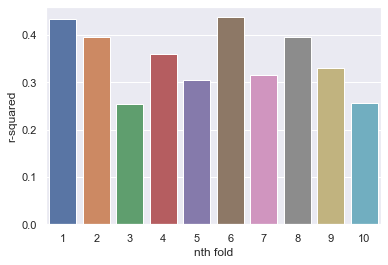

In [ ]:
sns.set()
sns.barplot(x=[1,2,3,4,5,6,7,8,9,10], y=scores)
plt.xlabel('nth fold')
plt.ylabel('r-squared')

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = Ridge(alpha=.5)
# evaluate model
scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1)
# report performance
print('r2: %.3f (%.3f)' % (mean(scores), std(scores)))

# poly_reg = 
# X_poly = poly_reg.fit_transform(X_train)
# pol_reg = LinearRegression()
# pol_reg.fit(X_poly, y_train)
# train_pred = pol_reg.predict(poly_reg.fit_transform(X_train))
# print("____ On Train Data ____")
# print(np.sqrt(mean_squared_error(y_train,train_pred)))
# print(r2_score(y_train,train_pred))

# test_pred = pol_reg.predict(poly_reg.fit_transform(X_test))
# print("____ On Test Data ____")
# test_score = r2_score(y_test,test_pred)
# test_mse = np.sqrt(mean_squared_error(y_test,test_pred))
# print(test_mse)

# print(test_score)

r2: 0.003 (0.010)


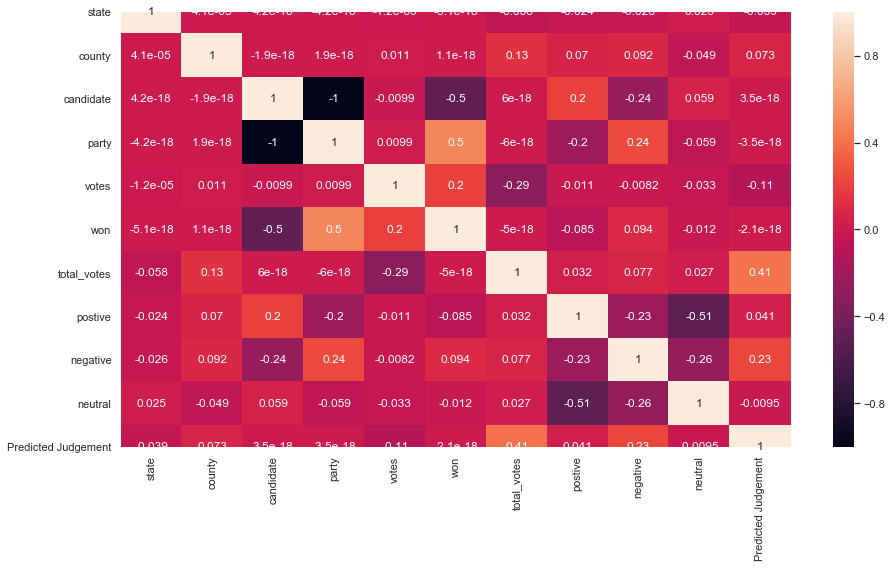

In [ ]:
# plot the heatmapt of correlation columns
import seaborn as sns
corr = dfcombine.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 14))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_scaled, y)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X, y) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
             error_score=nan,
             estimator=RFE(estimator=LinearRegression(copy_X=True,
                                                      fit_intercept=True,
                                                      n_jobs=None,
                                                      normalize=False),
                           n_features_to_select=None, step=1, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='r2', verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.008254,0.000384,0.001682,0.000085,1,{'n_features_to_select': 1},0.004985,-0.006448,0.005672,0.018909,0.002448,0.005113,0.008141,1,0.012490,0.013689,0.012104,0.009510,0.010261,0.011611,0.001521
1,0.007458,0.000669,0.001527,0.000174,2,{'n_features_to_select': 2},-0.004159,-0.005795,0.005916,0.018435,0.002676,0.003415,0.008655,5,0.015711,0.014966,0.012150,0.009712,0.010279,0.012564,0.002417
2,0.004015,0.000043,0.001099,0.000031,3,{'n_features_to_select': 3},-0.004707,-0.006747,0.008730,0.019461,0.005463,0.004440,0.009528,3,0.016783,0.016078,0.012785,0.010859,0.010637,0.013429,0.002572
3,0.003407,0.000054,0.001061,0.000052,4,{'n_features_to_select': 4},-0.004712,-0.006744,0.009280,0.020647,0.006718,0.005038,0.009984,2,0.016784,0.016079,0.013515,0.011448,0.011043,0.013774,0.002337
4,0.003249,0.001138,0.001234,0.000362,5,{'n_features_to_select': 5},-0.005143,-0.007110,0.009214,0.018342,0.005955,0.004251,0.009417,4,0.016890,0.016160,0.013556,0.011614,0.011194,0.013883,0.002311
5,0.001957,0.000232,0.001081,0.000074,6,{'n_features_to_select': 6},-0.009327,-0.008638,0.009873,0.015082,0.003125,0.002023,0.009756,6,0.017084,0.016912,0.013825,0.012564,0.012252,0.014527,0.002086
6,0.001865,0.000075,0.001012,0.000020,7,{'n_features_to_select': 7},-0.009327,-0.008638,0.009873,0.015082,0.003125,0.002023,0.009756,6,0.017084,0.016912,0.013825,0.012564,0.012252,0.014527,0.002086
7,0.001789,0.000032,0.001030,0.000088,8,{'n_features_to_select': 8},-0.009327,-0.008638,0.009873,0.015082,0.003125,0.002023,0.009756,6,0.017084,0.016912,0.013825,0.012564,0.012252,0.014527,0.002086
8,0.001921,0.000114,0.001034,0.000010,9,{'n_features_to_select': 9},-0.009327,-0.008638,0.009873,0.015082,0.003125,0.002023,0.009756,6,0.017084,0.016912,0.013825,0.012564,0.012252,0.014527,0.002086
9,0.001841,0.000052,0.000984,0.000016,10,{'n_features_to_select': 10},-0.009327,-0.008638,0.009873,0.015082,0.003125,0.002023,0.009756,6,0.017084,0.016912,0.013825,0.012564,0.012252,0.014527,0.002086


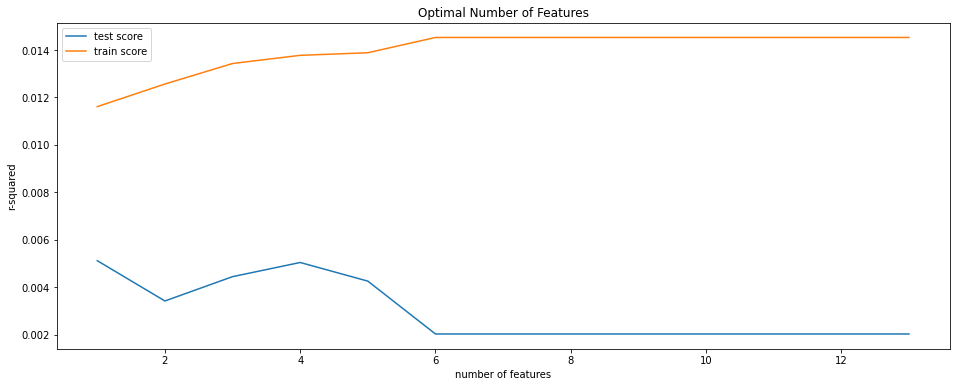

In [ ]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [ ]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=40)

In [ ]:
# final model
import sklearn
n_features_optimal = 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = lm.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print(r2)

0.007127974004216386


In [ ]:
from functools import partial
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="test")

In [ ]:
geocode(dfsenti.iloc[0].county).longitude

-122.4629897

In [ ]:
geocode = partial(geolocator.geocode, language="es")

In [ ]:
df_tweets

,postive,negative,neutral,Predicted Judgement,county,candidate
0,44,21,35,Strongly Democratic,San Francisco City and County,Joe Biden
1,43,27,30,Strongly Democratic,Honolulu County,Joe Biden
2,33,28,38,Strongly Democratic,Harris County,Joe Biden
3,39,25,36,Strongly Democratic,San Diego County,Joe Biden
4,41,23,36,Strongly Democratic,Travis County,Joe Biden
...,...,...,...,...,...,...
329,100,0,0,Insufficient Data,Burlington County,Donald Trump
330,0,50,50,Insufficient Data,Allen County,Donald Trump
331,100,0,0,Insufficient Data,Talladega County,Donald Trump
332,33,67,0,Insufficient Data,Jones County,Donald Trump


In [ ]:
geo_df = pd.DataFrame([], columns=['county', 'lat', 'lng'])

In [ ]:
for i, row in dfsenti.iterrows():
    info = geocode(row.county)
    counties.append(row.county)
    lats.append(info.latitude)
    longs.append(info.longitude)

In [ ]:
geo_df['county'] = counties
geo_df['lat'] = lats
geo_df['lng'] = longs
geo_df

,county,lat,lng
0,San Francisco City and County,37.764799,-122.462990
1,Honolulu County,21.468151,-157.960511
2,Harris County,29.811977,-95.374125
3,San Diego County,32.963784,-116.770628
4,Travis County,30.287857,-97.756139
...,...,...,...
329,Burlington County,39.932541,-74.722667
330,Allen County,40.807780,-84.057222
331,Talladega County,33.396708,-86.159714
332,Jones County,32.713595,-99.860611


In [ ]:
geo1 = pd.merge(geo_df, df_tweets, on=["county"])
geo1

,county,lat,lng,postive,negative,neutral,Predicted Judgement,candidate
0,San Francisco City and County,37.764799,-122.462990,44,21,35,Strongly Democratic,Joe Biden
1,San Francisco City and County,37.764799,-122.462990,31,36,34,Strongly Democratic,Donald Trump
2,Honolulu County,21.468151,-157.960511,43,27,30,Strongly Democratic,Joe Biden
3,Honolulu County,21.468151,-157.960511,33,35,32,Strongly Democratic,Donald Trump
4,Harris County,29.811977,-95.374125,33,28,38,Strongly Democratic,Joe Biden
...,...,...,...,...,...,...,...,...
663,Talladega County,33.396708,-86.159714,100,0,0,Insufficient Data,Donald Trump
664,Jones County,32.713595,-99.860611,0,0,0,Insufficient Data,Joe Biden
665,Jones County,32.713595,-99.860611,33,67,0,Insufficient Data,Donald Trump
666,Laramie County,41.273732,-104.726823,0,0,0,Insufficient Data,Joe Biden


In [ ]:
trump = geo1[geo1.candidate == 'Donald Trump']
trump

In [ ]:
biden = geo1[geo1.candidate == 'Joe Biden']
biden

In [ ]:
biden.head()

,county,lat,lng,postive,negative,neutral,Predicted Judgement,candidate
0,San Francisco City and County,37.764799,-122.462990,44,21,35,Strongly Democratic,Joe Biden
2,Honolulu County,21.468151,-157.960511,43,27,30,Strongly Democratic,Joe Biden
4,Harris County,29.811977,-95.374125,33,28,38,Strongly Democratic,Joe Biden
6,San Diego County,32.963784,-116.770628,39,25,36,Strongly Democratic,Joe Biden
8,Travis County,30.287857,-97.756139,41,23,36,Strongly Democratic,Joe Biden


In [ ]:
trump = trump[trump.lng <= 0]

In [ ]:
biden = biden[biden.lng <= 0]

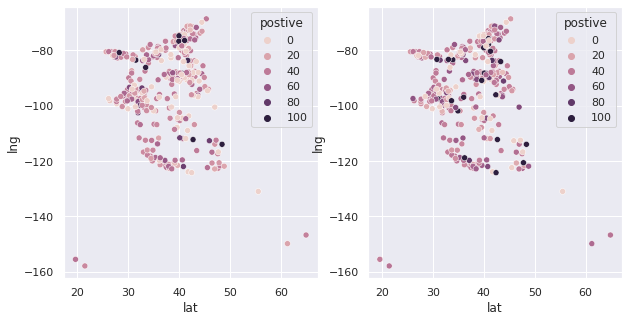

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
sns.scatterplot(data=trump, x="lat", y="lng", hue="postive", ax=ax[0])
sns.scatterplot(data=biden, x="lat", y="lng", hue="postive", ax=ax[1])

plt.show()